In [1]:
import numpy as np
import glob
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import sobel

SIZE = 128

In [2]:
train_img = []
train_label = [] 
for dir_path in glob.glob("Dataset/train/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_img.append(img)
        train_label.append(label)
        
train_img = np.array(train_img)
train_label = np.array(train_label)

with_mask
Dataset/train/with_mask/with_mask (94).jpg
Dataset/train/with_mask/with_mask (123).jpg
Dataset/train/with_mask/with_mask (20).jpg
Dataset/train/with_mask/with_mask (91).jpg
Dataset/train/with_mask/with_mask (189).jpg
Dataset/train/with_mask/with_mask (113).jpg
Dataset/train/with_mask/with_mask (28).jpg
Dataset/train/with_mask/with_mask (112).jpg
Dataset/train/with_mask/with_mask (153).jpg
Dataset/train/with_mask/with_mask (158).jpg
Dataset/train/with_mask/with_mask (130).jpg
Dataset/train/with_mask/with_mask (177).jpg
Dataset/train/with_mask/with_mask (195).jpg
Dataset/train/with_mask/with_mask (115).jpg
Dataset/train/with_mask/with_mask (180).jpg
Dataset/train/with_mask/with_mask (8).jpg
Dataset/train/with_mask/with_mask (62).jpg
Dataset/train/with_mask/with_mask (140).jpg
Dataset/train/with_mask/with_mask (100).jpg
Dataset/train/with_mask/with_mask (197).jpg
Dataset/train/with_mask/with_mask (79).jpg
Dataset/train/with_mask/with_mask (186).jpg
Dataset/train/with_mask/with_m

Dataset/train/with_mask/with_mask (52).jpg
Dataset/train/with_mask/with_mask (147).jpg
Dataset/train/with_mask/with_mask (19).jpg
Dataset/train/with_mask/with_mask (84).jpg
Dataset/train/with_mask/with_mask (182).jpg
Dataset/train/with_mask/with_mask (157).jpg
Dataset/train/with_mask/with_mask (23).jpg
Dataset/train/with_mask/with_mask (114).jpg
Dataset/train/with_mask/with_mask (133).jpg
Dataset/train/with_mask/with_mask (41).jpg
without_mask
Dataset/train/without_mask/without_mask (5).jpg
Dataset/train/without_mask/without_mask (68).jpg
Dataset/train/without_mask/without_mask (108).jpg
Dataset/train/without_mask/without_mask (207).jpg
Dataset/train/without_mask/without_mask (140).jpg
Dataset/train/without_mask/without_mask (79).jpg
Dataset/train/without_mask/without_mask (97).jpg
Dataset/train/without_mask/without_mask (19).jpg
Dataset/train/without_mask/without_mask (186).jpg
Dataset/train/without_mask/without_mask (112).jpg
Dataset/train/without_mask/without_mask (75).jpg
Dataset/t

Dataset/train/without_mask/without_mask (46).jpg
Dataset/train/without_mask/without_mask (77).jpg
Dataset/train/without_mask/without_mask (95).jpg
Dataset/train/without_mask/without_mask (144).jpg
Dataset/train/without_mask/without_mask (41).jpg
Dataset/train/without_mask/without_mask (110).jpg
Dataset/train/without_mask/without_mask (162).jpg
Dataset/train/without_mask/without_mask (30).jpg
Dataset/train/without_mask/without_mask (202).jpg
Dataset/train/without_mask/without_mask (109).jpg
Dataset/train/without_mask/without_mask (178).jpg
Dataset/train/without_mask/without_mask (76).jpg
Dataset/train/without_mask/without_mask (7).jpg
Dataset/train/without_mask/without_mask (179).jpg
Dataset/train/without_mask/without_mask (16).jpg
Dataset/train/without_mask/without_mask (20).jpg
Dataset/train/without_mask/without_mask (98).jpg
Dataset/train/without_mask/without_mask (72).jpg
Dataset/train/without_mask/without_mask (201).jpg
Dataset/train/without_mask/without_mask (31).jpg
Dataset/train

In [3]:
test_img = []
test_label = [] 
for dir_path in glob.glob("Dataset/test/*"):
    label2 = dir_path.split("/")[-1]
    print(label2)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_img.append(img)
        test_label.append(label2)
        
test_img = np.array(test_img)
test_label = np.array(test_label)

with_mask
Dataset/test/with_mask/with_mask (20).jpg
Dataset/test/with_mask/with_mask (28).jpg
Dataset/test/with_mask/with_mask (8).jpg
Dataset/test/with_mask/with_mask (13).jpg
Dataset/test/with_mask/with_mask (18).jpg
Dataset/test/with_mask/with_mask (1).jpg
Dataset/test/with_mask/with_mask (11).jpg
Dataset/test/with_mask/with_mask (35).jpg
Dataset/test/with_mask/with_mask (6).jpg
Dataset/test/with_mask/with_mask (22).jpg
Dataset/test/with_mask/with_mask (30).jpg
Dataset/test/with_mask/with_mask (40).jpg
Dataset/test/with_mask/with_mask (47).jpg
Dataset/test/with_mask/with_mask (34).jpg
Dataset/test/with_mask/with_mask (49).jpg
Dataset/test/with_mask/with_mask (2).jpg
Dataset/test/with_mask/with_mask (45).jpg
Dataset/test/with_mask/with_mask (33).jpg
Dataset/test/with_mask/with_mask (51).jpg
Dataset/test/with_mask/with_mask (17).jpg
Dataset/test/with_mask/with_mask (25).jpg
Dataset/test/with_mask/with_mask (15).jpg
Dataset/test/with_mask/with_mask (14).jpg
Dataset/test/with_mask/with_

In [4]:
def image_segmentation(img, k):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = np.uint8(segmented_image)
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

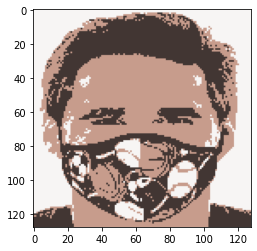

In [8]:
image = train_img[0]
segmented_image = image_segmentation(image, 3)
plt.imshow(segmented_image)
plt.show()

In [10]:
def feature_extractor(dataset):
    x_train = dataset
    img_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):
        
        df = pd.DataFrame()
        
        input_img = x_train[image, :,:,:]
        img = input_img
   
        # FEATURE 1 - Pixel values
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values/255

        # FEATURE 2 Sobel
        segmentasi = image_segmentation(img, 3)
#         edge_sobel = sobel(segmentasi)
#         edge_sobel1 = edge_sobel.reshape(-1)
#         df['Sobel'] = edge_sobel1/255
        segemen = segmentasi.reshape(-1)
        df['segementasi'] = segemen/255

        img_dataset = img_dataset.append(df)
        
    return img_dataset

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_label)
test_encoded = le.transform(test_label)
le.fit(train_label)
train_encoded = le.transform(train_label)

x_train, y_train, x_test, y_test = train_img, train_encoded, test_img, test_encoded

In [12]:
image_features = feature_extractor(x_train)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_svm = np.reshape(image_features, (x_train.shape[0], -1)) 

from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_svm, y_train)

SVC(decision_function_shape='ovo')

In [13]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_svm = np.reshape(test_features, (x_test.shape[0], -1))

test_prediction = SVM_model.predict(test_for_svm)

test_prediction = le.inverse_transform(test_prediction)

In [14]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_label, test_prediction))

Accuracy =  0.9519230769230769


<AxesSubplot:>

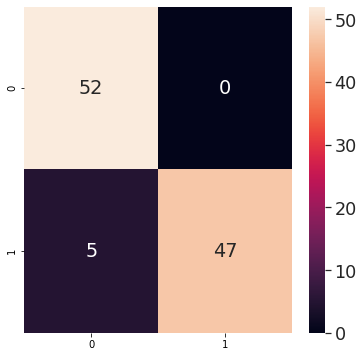

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)